# 第四周作业参考答案

## 特别说明
1.请大家多查资料了解各种损失函数的定义。示例参考https://zhuanlan.zhihu.com/p/58883095 

2.第一题（c）计算0-1损失函数前，需要将预测的概率值转换成0，1类，通常是以概率0.5为界限。原分类样本标签y与预测分类标签ypred均为0-1取值的序列，若对应值yi与ypredi一致，则该样本损失为0，否则损失为1。

3.第一题（d）分层抽样是针对不同类别的，本次作业中是分别从0类中、1类中抽样，具体参考第(f)问中讨论的分别从正例、负例中抽样。


# 第一题
(f)小问，

这一小问作业中修改了书中的原题，主要是想考察大家对分类任务中对样本数据的划分方式的理解。在分类任务中，训练集、测试集的划分要尽可能保持数据分布的一致性，避免因数据划分过程引入的额外的偏差而对最终结果产生影响。也即划分后的结果至少要保持样本的类别比例相似。

题目中给出了总样本数1000个，其中正例500个，反例500个，将其划分为70%的训练集和30%的测试集。只要选出了训练集，剩下的就是测试集样本。

第一种：严格考虑正负样本的比例，也即分层采样。已知正例500个，反例500个，正：反=1：1，那么训练集中正：反也要1：1.训练集总大小为$1000*70\%=700$个样本，那么划分后，训练集中正例应该有350个，反例应该有350个。实际划分样本集时需要用代码实现，从500个正例中**随机**抽取350个，从500个反例中**随机**抽取350个,作为训练集。

第二种：保证划分后，训练集、测试集中样本类别比例与原样本集比例相似。这种情况是实际中比较常用的，因为通常情况下正负样本并不是正好1：1，也有可能是351：87这种；而且样本集中也不一定是前面500个是正例，后面500个是负例，所以如果采用分层的话，首先要按类别将500个正例选出来，再从其中随机选350个，过程比较麻烦。可以使用**将原数据集1000个随机打乱顺序**，再选取其中700个样本作为训练集。这种方式得到的正例与反例的比例也是约等于原比例的。

### 参考2019202449-舒纯新

## a小问
将数据集按照留出法分为训练集(比例0.8)和测试集(比例0.2)，对于函
数$mpg= 40-0.15*horsepower$,编写程序估计平方损失下的泛化误差,自行设定试验次数，进行泛化;
### 代码实现

In [1]:
import pandas as pd
A=pd.read_csv('auto.csv')
A.head()

,mpg,horsepower,weight,ind
0,18.0,130,3504,0
1,15.0,165,3693,0
2,18.0,150,3436,0
3,16.0,150,3433,0
4,17.0,140,3449,0


In [15]:
from sklearn .model_selection import train_test_split
import numpy as np
#使用train_test_split划分训练集和到试集

R=np.zeros(20)   #创建长度为20的全零序列，用来存储每次试验的泛化误差
for i in range(0,20):
    train_X,test_X,train_Y,test_Y = train_test_split(A.horsepower,A.mpg,test_size=0.2,random_state=100*i)
    #x为原始数据的自变量，Y为原始数据因变量﹔
    test_Y_pred=40-0.15*test_X
    error=(test_Y-test_Y_pred)**2
    #用error表示每一项的误差值，取平均计入R算作一次测试的泛化误差，共测试二十次
    R[i]=round(np.mean(error),3)
print("二十次测试中，每一次的误差分别为：\n",R)
print("二十次测试的平均误差为：\n",round(np.mean(R),3))


二十次测试中，每一次的误差分别为：
 [22.613 25.09  24.736 22.582 26.582 26.002 30.563 26.376 23.572 17.572
 23.88  21.948 23.184 26.654 26.756 25.702 24.212 23.397 24.974 30.102]
二十次测试的平均误差为：
 24.825


## b小问
将数据集按照留p交叉验证的方式提取测试集，K=20划分采取无放回抽样p=10,对于函数$mpg = 40-0.15*horsepower$,编写程序计算平方损失下的泛化误差
### 代码实现

In [16]:
R=np.zeros(20)   #创建长度为20的全零序列，用来存储每次试验的泛化误差,K次
for i in range(0,20):                                          #test_size参数表示样本占比，如果是整数的话就是样本的数量
    train_X,test_X,train_Y,test_Y = train_test_split(A.horsepower,A.mpg,test_size=10,random_state=i)
    #x为原始数据的自变量，Y为原始数据因变量﹔
    test_Y_pred=40-0.15*test_X
    error=(test_Y-test_Y_pred)**2
    #用error表示每一项的误差值，取平均计入R算作一次测试的泛化误差，共测试二十次
    R[i]=round(np.mean(error),3)
print("二十次测试中，每一次的误差分别为：\n",R)
print("二十次测试的平均误差为：\n",round(np.mean(R),3))

二十次测试中，每一次的误差分别为：
 [28.726 17.628 43.311 20.399 36.161 25.603 22.204 14.425 15.565 27.563
 21.062 30.638  7.914 26.357 13.41  50.179 23.606 32.273 44.155 11.789]
二十次测试的平均误差为：
 25.648


## c小问

In [18]:
from sklearn .model_selection import train_test_split
import numpy as np
import math
train_X,test_X,train_Y,test_Y = train_test_split(A.mpg,A.weight,test_size=0.2,random_state=123)
m=np.percentile(test_X,75)  #m为3/4位数
mpg01=np.zeros(len(test_X)) #构造mpg01数组
mpg01[test_X>=m]=1
err=math.e**(3.85-0.001*test_Y)/(1+math.e**(3.85-0.001*test_Y)) 
err[err>=0.5]=1
err[err<0.5]=0
loss01=sum(mpg01!=err)  #根据0-1损失函数,y和ypred不一致时损失为1，y和ypred一致时，损失为0

print("留出法抽样下，0-1损失下的泛化误差为:")
print(loss01)

留出法抽样下，0-1损失下的泛化误差为:
43


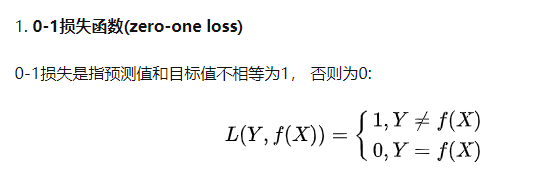

# d小问
### 参考2019202197_饶子扬

In [45]:
dta = pd.read_csv('auto.csv')
# 建立mpg01
upperQuarter = np.percentile(dta['mpg'], 75, axis = 0) # 75分位数
dta['mpg01'] = dta.apply(lambda x : 1 if x['mpg'] > upperQuarter else 0, axis = 1)
# 求P(mpg01 = 1)的函数
import math
def p1(x):
    p = math.exp(3.85 - 0.001 * x) / (1 + math.exp(3.85 - 0.001 * x))
    return p

# 分层
set1 = dta.iloc[np.where(dta['mpg01'] == 1)]
set0 = dta.iloc[np.where(dta['mpg01'] == 0)]

# 抽测试集 合并
testSet1 = set1.sample(int(len(set1) * 0.2))
testSet0 = set0.sample(int(len(set0) * 0.2))
testSet = pd.concat([testSet1, testSet0], axis = 0)

# 求泛化误差
err= testSet.apply(lambda x:  p1(x['weight']), axis = 1)
err[err>=0.5]=1
err[err<0.5]=0
loss01=sum(testSet['mpg01']!=err)  #根据0-1损失函数,y和ypred不一致时损失为1，y和ypred一致时，损失为0
print("留出法抽样下，0-1损失下的泛化误差为:")
print(loss01)

留出法抽样下，0-1损失下的泛化误差为:
48


## e小问

### 问题
根据以上实验，结合教材，分析分层抽样和不同的抽样方式对泛化误差的影响

### 解答
- 分层抽样：保留类别比例的抽样称为分层抽样，分层抽样可以使训练集与测试集保持类别比例相等，消除了因为抽样比例而导致的泛化误差，只剩下由于训练集/测试集数据分布差异而产生的偏差
- 非分层抽样：对于简单随机抽样，系统抽样等不主动保持类别比例的抽样方法，泛化误差中可能会包含了抽样比例不同导致的部分，导致泛化标准误偏大，不利于估计的精确性；当不同类别样本数量很多，比例相差不大时泛化误差与分层抽样相似，但当不同类别样本比例相差很大，或者样本数量很少时，其泛化误差会明显大于分层抽样的泛化误差

# 第二题
### 参考一2019202450-陈诺

### <font face="宋体" color=black>第二题<font face="宋体">

 <font face="宋体">第二章 模型评估与选择b.pdf中第32页，参照例题，作ROC曲线和P-R曲线。<font face="宋体">
    
<font face="宋体" color=black>代码实现<font face="宋体">

In [46]:
# 手动输入数据
b = np.array(['p','p','n','p','p','p','n','n','p','n','p','n','p','n','n','n','p','n','p','n',0.9,0.8,0.7,0.6,0.55,0.54,0.53,0.52,0.51,0.505,0.4,0.39,0.38,0.37,0.36,0.35,0.34,0.33,0.30,0.1]).reshape(2,20)
data = pd.DataFrame(b.T,columns=['Class','Score'],index=range(1,21))
# 展示数据
data

,Class,Score
1,p,0.9
2,p,0.8
3,n,0.7
4,p,0.6
5,p,0.55
6,p,0.54
7,n,0.53
8,n,0.52
9,p,0.51
10,n,0.505


20组FPR和TPR的值:
 [[0.  0. ]
 [0.  0.1]
 [0.  0.2]
 [0.1 0.2]
 [0.1 0.3]
 [0.1 0.4]
 [0.1 0.5]
 [0.2 0.5]
 [0.3 0.5]
 [0.3 0.6]
 [0.4 0.6]
 [0.4 0.7]
 [0.5 0.7]
 [0.5 0.8]
 [0.6 0.8]
 [0.7 0.8]
 [0.8 0.8]
 [0.8 0.9]
 [0.9 0.9]
 [0.9 1. ]
 [1.  1. ]]


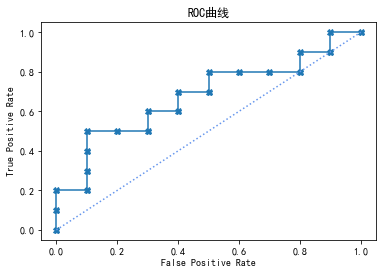

In [47]:
import matplotlib.pyplot as plt
# 记录点的位置
dot = np.array([[0,0]])
# 初始位置
x,y = 0,0
# 数据
Class = np.array(data['Class'])
Score = np.array(data['Score'])
# n1表示正样本的数量,n0表示负样本的数量
n1,n0 = np.sum(Class=='p'),np.sum(Class=='n')
# path1表示正样本的移动距离,path0表示负样本的移动距离
path1 = 1/n1
path0 = 1/n0
# 画ROC曲线
for i in range(20):
    if Class[i] == 'p':
        y = y + path1        
    else:
        x = x + path0
    dot = np.append(dot,[[x,y]],axis=0)
x_ = np.transpose(dot[:,0])
y_ = np.transpose(dot[:,1])
print("20组FPR和TPR的值:\n",dot)

#这两行用于解决图中中文乱码问题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

fig = plt.figure()
plt.plot(x_,y_,'X-')
plt.plot([0,1],[0,1],':',color='cornflowerblue')
plt.title('ROC曲线')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

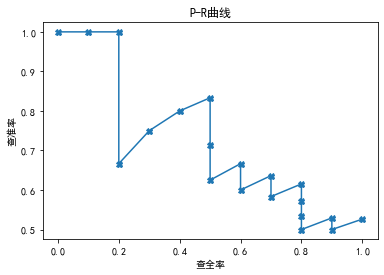

In [48]:
from sklearn.metrics import precision_recall_curve
'''
查准率P表示在所有被认为是正确的样例中，有多少个被正确分类的样例
查全率R表示在所有本身即是正确的样例中，有多少个被正确分类的样例
'''
y_true = np.array([1,1,0,1,1,1,0,0,1,0,1,0,1,0,0,0,1,0,1,0])
y_scores = np.array([0.9,0.8,0.7,0.6,0.55,0.54,0.53,0.52,0.51,0.505,0.4,0.39,0.38,0.37,0.36,0.35,0.34,0.33,0.30,0.1])
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
fig1 = plt.figure()
plt.title("P-R曲线")
plt.xlabel("查全率")         # recall
plt.ylabel("查准率")         # precision
plt.plot(recall,precision,'X-')
plt.show()

### 参考二 2018200222-查王皓天

## Solution


该题的任务是绘制roc pr曲线，下面用了两种方法绘制，一个是利用sklearn函数，另一个是自己根据pr roc曲线的定义，编写函数绘制

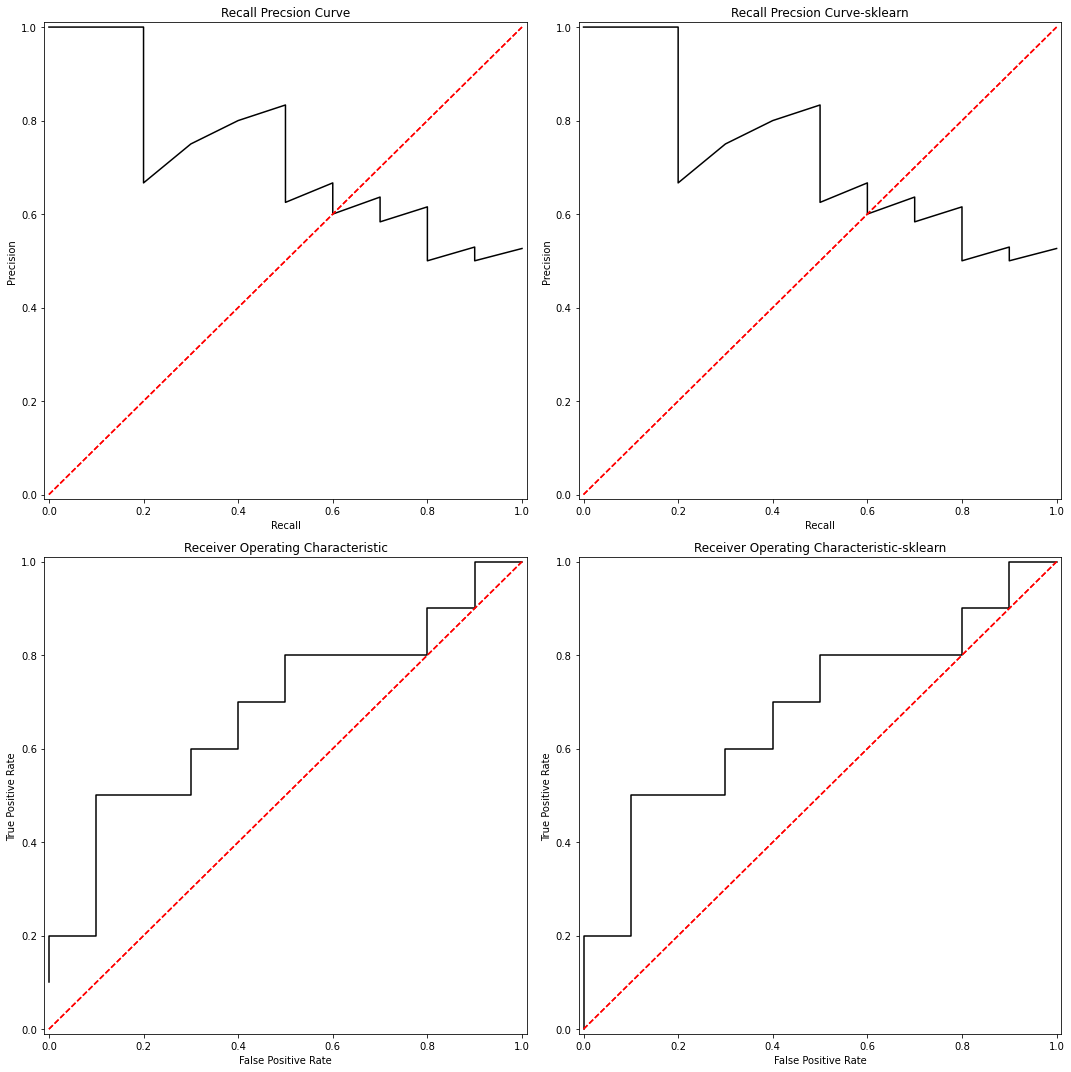

In [3]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve

#绘制pr曲线
def PR_curve(y,pred):
    
    #用numpy来做，进行排序
    
    pos = np.sum(y == 1)   #计算正负例个数
    neg = np.sum(y == 0)
    pred_sort = np.sort(pred)[::-1]  # pred从大到小排序
    index = np.argsort(pred)[::-1]  # 从大到小排序,提取序号，用于给y排序
    
    y_sort = y[index]   #排序后的y 和predict都有了


    Pre = []
    Rec = []
    for i, item in enumerate(pred_sort):   
        if i == 0:#因为计算precision的时候分母要用到i，当i为0时会出错，所以单独列出
            Pre.append(1)
            Rec.append(0)


        else:
            Pre.append(np.sum((y_sort[:i] == 1)) /i)
            Rec.append(np.sum((y_sort[:i] == 1)) / pos)

            
    ## 画图
    plt.plot(Rec, Pre, 'k')
    #plt.legend(loc='lower right')

    plt.title('Recall Precsion Curve')
    plt.plot([(0, 0), (1, 1)], 'r--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 01.01])
    plt.ylabel('Precision')
    plt.xlabel('Recall')
    
def ROC_curve(y,pred):    #同理绘制roc曲线
    pos = np.sum(y == 1)
    neg = np.sum(y == 0)
    pred_sort = np.sort(pred)[::-1]  #从大到小排序
    index = np.argsort(pred)[::-1]#从大到小排序
    y_sort = y[index]

    tpr = []
    fpr = []

    for i,item in enumerate(pred_sort):
        tpr.append(np.sum((y_sort[:i+1] == 1)) / pos)
        fpr.append(np.sum((y_sort[:i+1] == 0)) / neg)

    #画图
    plt.plot(fpr, tpr, 'k')
    plt.title('Receiver Operating Characteristic')
    plt.plot([(0, 0), (1, 1)],'r--')
    plt.xlim([-0.01,1.01])
    plt.ylim([-0.01,01.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    

y_true = np.array([1,1,0,1,1,1,0,0,1,0,1,0,1,0,0,0,1,0,1,0])
y_scores = np.array([0.9, 0.8,0.7,0.6,0.55,0.54,0.53,0.52,0.51,0.505,0.4,0.39,0.38,0.37,0.36,0.35,0.34,0.33,0.30,0.1])


plt.figure(figsize=(15,15))

plt.subplot(221)   #绘制四张图
PR_curve(y_true,y_scores)  #利用函数

plt.subplot(222)
#PR_curve(y_true,y_scores)
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)  #利用sklrean
plt.plot(recall,precision,'k')
plt.title('Recall Precsion Curve-sklearn')
plt.plot([(0, 0), (1, 1)], 'r--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 01.01])
plt.ylabel('Precision')
plt.xlabel('Recall')

plt.subplot(223)   #利用函数是
ROC_curve(y_true,y_scores)

plt.subplot(224)   #利用sklearn
fpr, tpr, thresholds = roc_curve(y_true, y_scores, pos_label=1)
plt.plot(fpr, tpr,'k')
plt.title('Receiver Operating Characteristic-sklearn')
plt.plot([(0, 0), (1, 1)],'r--')
plt.xlim([-0.01,1.01])
plt.ylim([-0.01,01.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.tight_layout()
